In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score



In [2]:
np.set_printoptions(suppress=True)
df1 = pd.read_csv("C:/Users/arjun/jup/Project/training.txt",sep="\s+",header=None)
df1.columns=['ID','Features','Values']
df3 = pd.read_excel("C:/Users/arjun/jup/Project/test_sample.xlsx",sheet_name="data",sep="\s+",header=None)
df3.columns=['ID','Features','Values']


In [3]:
mat1 = pd.pivot_table(df1, index='ID', columns='Features', values='Values')
mat1 = mat1.fillna(0)
mat3 = pd.pivot_table(df3, index='ID', columns='Features', values='Values')
mat3 = mat3.fillna(0)

In [4]:
df2 = pd.read_csv("C:/Users/arjun/jup/Project/label_training.txt",sep="\t",header=None)
df2.columns = ['Classes']
df4 = pd.read_excel("C:/Users/arjun/jup/Project/test_sample.xlsx",sheet_name="label",sep="\t",header=None)
df4.columns = ['Classes']

In [5]:
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
mat1 = svd.fit_transform(mat1)

In [6]:
xtrain, xtest = train_test_split(mat1, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(df2, test_size=0.2, shuffle=False)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

In [7]:
clf = svm.SVC(kernel='linear')
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
accuracy_score(ytest,pred)

0.962059620596206

In [8]:
#mat1 = pd.DataFrame(data=x,index=np.arange(1, x.shape[0]+1),columns=np.arange(1, x.shape[1]+1))

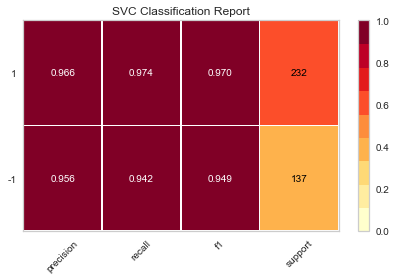

In [10]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
model = svm.SVC(kernel='linear')
classes = [1,1,-1]
viz = ClassificationReport(model, classes=classes, support=True)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()